## Actividad Limpieza de Datos
### Integrantes del equipo:
##### Vera Sofía Acevedo Gómez A01747156
##### Yael Michel García López A01750911

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Carga de los datos
df = pd.read_csv("bike_buyers.csv")

In [61]:
# Verificar la cantidad de datos
#row, cols = df.shape
#print(f"Cantidad de datos (filas): {row}")
#print(f"Cantidad de columnas: {cols}")

# Variables 
#print(f"\nVariables: \n{df.columns.tolist()}")

# Identificar el tipo de variables
#print(f"\nTipo de variables: \n{df.dtypes}")

# Cantidad de datos, Variables, Tipo de Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 141.7+ KB


In [72]:
df.head(3)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12591,Married,Female,"30,000",4.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,45.0,No
1,14058,Single,Male,"70,000",0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,41.0,Yes
2,23962,Married,Female,"10,000",0.0,Partial High School,Manual,Yes,2.0,1-2 Miles,Europe,32.0,No


In [10]:
# Income de object a float
df["Income"] = pd.to_numeric(df["Income"].str.replace(",", ""))

In [74]:
# ??? Pasamos todas las columnas tipo object a minúsculas
columnas = ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Region", "Commute Distance", "Purchased Bike"]
for col in columnas:
  df[col] = df[col].str.strip().str.lower()

In [13]:
df[df.duplicated()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [7]:
# Eliminación de duplicados
df = df.drop_duplicates()

In [60]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              6
Children            8
Education           0
Occupation          0
Home Owner          0
Cars                9
Commute Distance    0
Region              0
Age                 8
Purchased Bike      0
dtype: int64

In [30]:
df["Marital Status"].describe()
#df["Income"].plot.box()

count        1000
unique          2
top       Married
freq          542
Name: Marital Status, dtype: object

37     170000.0
421    170000.0
647    170000.0
702    160000.0
730    160000.0
Name: Income, dtype: float64

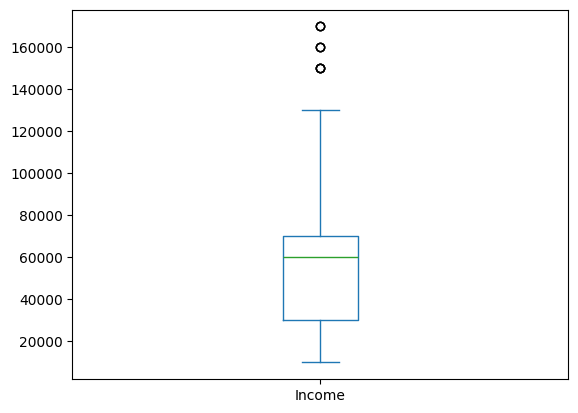

In [15]:
df["Income"].plot.box()
df["Income"].nlargest(5)

In [59]:
df["Income"].nlargest(5)

37     170000.0
421    170000.0
647    170000.0
702    160000.0
730    160000.0
Name: Income, dtype: float64

In [33]:
df["Marital Status"].mode()

0    Married
Name: Marital Status, dtype: object

In [31]:
#Los datos faltantes de "Marital Status" son reemplazados con la moda
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)

In [38]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Male      500
Female    489
Name: count, dtype: int64


In [54]:
#Los datos faltantes de "Gender" son reemplazados con la moda
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [58]:
#Los datos faltantes de "Home Owner" son reemplazados con la moda
df['Home Owner'].fillna(df['Home Owner'].mode()[0], inplace=True)

C:\Users\veras\AppData\Local\Temp\ipykernel_11084\4207307441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Home Owner'].fillna(df['Home Owner'].mode()[0], inplace=True)


In [49]:
df["Education"].describe()
df["Education"].value_counts()

Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

In [55]:
df["Occupation"].describe()
df["Occupation"].value_counts()

Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64

Home Owner
Yes    682
No     314
Name: count, dtype: int64